In [10]:
%matplotlib inline
import statsmodels as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV

train_df = pd.read_csv('train.tsv', index_col='id', delimiter='\t')
train_df

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29991,V29992,V29993,V29994,V29995,V29996,V29997,V29998,V29999,Y
id,,,,,,,,,,,,,,,,,,,,,
0,1.468,1.476,1.484,1.490,1.494,1.498,1.499,1.499,1.497,1.490,...,1.561,1.562,1.561,1.559,1.558,1.558,1.556,1.555,1.553,173
1,1.493,1.492,1.490,1.490,1.490,1.492,1.493,1.497,1.499,1.500,...,1.410,1.408,1.408,1.408,1.408,1.410,1.411,1.412,1.416,155
3,1.581,1.581,1.583,1.584,1.586,1.589,1.591,1.591,1.591,1.591,...,1.532,1.534,1.533,1.530,1.528,1.527,1.527,1.526,1.526,134
4,1.531,1.530,1.530,1.530,1.530,1.530,1.530,1.531,1.531,1.530,...,1.523,1.524,1.523,1.522,1.520,1.520,1.522,1.524,1.523,130
6,1.522,1.521,1.520,1.519,1.518,1.517,1.515,1.514,1.515,1.514,...,1.561,1.561,1.560,1.558,1.559,1.559,1.558,1.559,1.561,139
7,1.543,1.547,1.551,1.555,1.562,1.568,1.572,1.576,1.580,1.583,...,1.480,1.474,1.467,1.462,1.458,1.454,1.450,1.446,1.442,135
8,1.516,1.517,1.519,1.521,1.528,1.530,1.527,1.525,1.523,1.521,...,1.569,1.576,1.581,1.582,1.583,1.583,1.581,1.581,1.581,198
9,1.539,1.539,1.539,1.538,1.539,1.539,1.538,1.538,1.538,1.538,...,1.539,1.537,1.536,1.535,1.532,1.533,1.535,1.535,1.535,178
10,1.809,1.807,1.804,1.802,1.798,1.796,1.793,1.790,1.785,1.780,...,1.551,1.551,1.551,1.551,1.549,1.548,1.548,1.547,1.546,173


In [37]:
x_train = train_df.ix[:, :'V29999']
y_train = train_df.ix[:, 'Y']

In [27]:
y_train.describe()

count    144.000000
mean     163.222222
std       32.030459
min       93.000000
25%      135.000000
50%      161.500000
75%      186.000000
max      295.000000
Name: Y, dtype: float64

In [41]:
(x_train != 0).sum(axis=1)

id
0      29207
1      29798
3      29996
4      29999
6      29360
7      29931
8      29872
9      29904
10     29782
11     29603
13     29845
14     29992
15     28810
16     29778
17     29895
20     29441
21     29996
22     29817
23     29398
25     29825
26     29343
27     28630
28     29499
29     29882
30     29900
31     29384
32     29906
33     29961
34     29820
35     29821
       ...  
162    29815
163    24818
164    29901
165    28790
166    29291
167    29944
168    29997
169    29886
171    29931
172    29946
173    29910
175    29985
177    29969
178    29824
179    29688
180    29808
181    28930
182    29999
183    29901
184    29954
186    29960
189    29748
190    29918
192    29960
193    29856
194    29953
195    29735
196    29913
197    29899
198    29646
dtype: int64

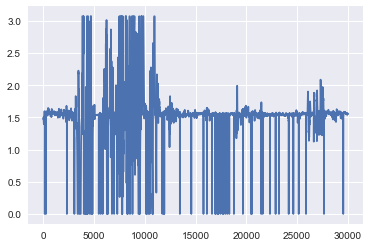

In [69]:
time = np.arange(30000)
pulse = x_train.ix[0, :].values.reshape(30000)
print()
plt.figure()
plt.plot(time, pulse)

In [74]:
x_train.ix[0, :].describe(percentiles=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95])

count    30000.000000
mean         1.529314
std          0.425959
min          0.000000
5%           0.811950
10%          1.348000
25%          1.523000
50%          1.548000
75%          1.571000
90%          1.675000
95%          2.077000
max          3.071000
Name: 0, dtype: float64

In [79]:
rf = RandomForestRegressor(
    bootstrap=True,
    n_estimators=10,
    criterion='mse', 
    max_features='sqrt',
    random_state=1,
    oob_score=True,
)

rf.fit(x_train, y_train)
rf.oob_score_

/Users/yoko/.anyenv/envs/pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


-0.66514481564324845